## Importing The Packages

In [1]:
import pandas as pd
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
%matplotlib inline

## Loading The Data

In [2]:
dataset = pd.read_csv("Geom(1).csv")

In [12]:
dataset.head()

,,.1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121
0,82,0,81.55081,8.571335,80.20810,17.04875,77.98663,25.33940,74.91074,33.35240,...,74.91058,-33.35272,77.98654,-25.33972,80.20804,-17.04910,81.55075,-8.571701,82,-0.000381
1,82,0,81.55078,8.571320,80.20813,17.04877,77.98663,25.33939,74.91071,33.35242,...,74.91058,-33.35272,77.98651,-25.33972,80.20801,-17.04910,81.55078,-8.571686,82,-0.000366
2,129,0,128.29330,13.484180,126.18100,26.82060,122.68630,39.86319,117.84740,52.46902,...,117.84720,-52.46951,122.68610,-39.86371,126.18090,-26.82115,128.29330,-13.484740,129,-0.000595
3,108,0,107.40840,11.289080,105.64000,22.45447,102.71410,33.37384,98.66290,43.92755,...,98.66272,-43.92796,102.71400,-33.37427,105.63980,-22.45493,107.40830,-11.289550,108,-0.000504
4,145,0,144.20570,15.156620,141.83140,30.14719,137.90320,44.80746,132.46410,58.97681,...,132.46390,-58.97736,137.90300,-44.80804,141.83130,-30.14783,144.20560,-15.157260,145,-0.000671


In [3]:
#maximum point in the dataset
dataset.max().max()

145.0

In [4]:
train_X = dataset[:17]
test_X = dataset[17:]

## Creating The Model

In [5]:
encoding_dim = 30  # 30 floats -> compressed from 122 point

# This is our input image
input_img = keras.Input(shape=(122,))

# Hidden layer in the encoded model
hidden = layers.Dense( 80 , activation = keras.layers.LeakyReLU(alpha=1) ) (input_img)

# "encoded" is the encoded representation of the input
encoded = layers.Dense( encoding_dim, activation = keras.layers.LeakyReLU(alpha=1) )(hidden)

# Hidden layer in the decoded model
hidden_2 = layers.Dense( 80 , activation = keras.layers.LeakyReLU(alpha=1) ) (encoded)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(122, activation= keras.layers.LeakyReLU(alpha=1) )(hidden_2)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (60-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

# Clone of the decoder hidden layer 
decoder_hidden = autoencoder.layers[-2](encoded_input)
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1](decoder_hidden)
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [6]:
print("Autoencoder Model")
autoencoder.summary()
print("=============================\n")

print("Encoder Model")
encoder.summary()
print("=============================\n")

print("Decoder Model")
decoder.summary()
print("=============================")


Autoencoder Model
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 122)]             0         
_________________________________________________________________
dense (Dense)                (None, 80)                9840      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 80)                2480      
_________________________________________________________________
dense_3 (Dense)              (None, 122)               9882      
Total params: 24,632
Trainable params: 24,632
Non-trainable params: 0
_________________________________________________________________

Encoder Model
Model: "model_1"
_________________________________________________________________
Layer (

### Training  The Model

In [7]:
autoencoder.fit(train_X, train_X,
                epochs=100,
                batch_size=256,
                shuffle=True,
                )

Epoch 1/100
1/1 [==============================] - 1s 972ms/step - loss: 10197.8203
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 7416.2803
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 5703.8320
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 4699.8750
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 4136.5024
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 3811.7566
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 3579.7754
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 3358.6494
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 3115.7000
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 2844.0569
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 2547.2932
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 2235.9229
Epoch 13/100
1/1 [====

### Generating Unseen Circles

In [8]:
encoded_circles = encoder.predict(test_X)
decoded_circles = decoder.predict(encoded_circles)

In [9]:
decoded_circles.shape


(5, 122)

### Calculate The Error 

In [10]:
autoencoder.evaluate(decoded_circles , test_X)

1/1 [==============================] - 0s 229ms/step - loss: 0.1756


0.17564381659030914

## Data Visualization

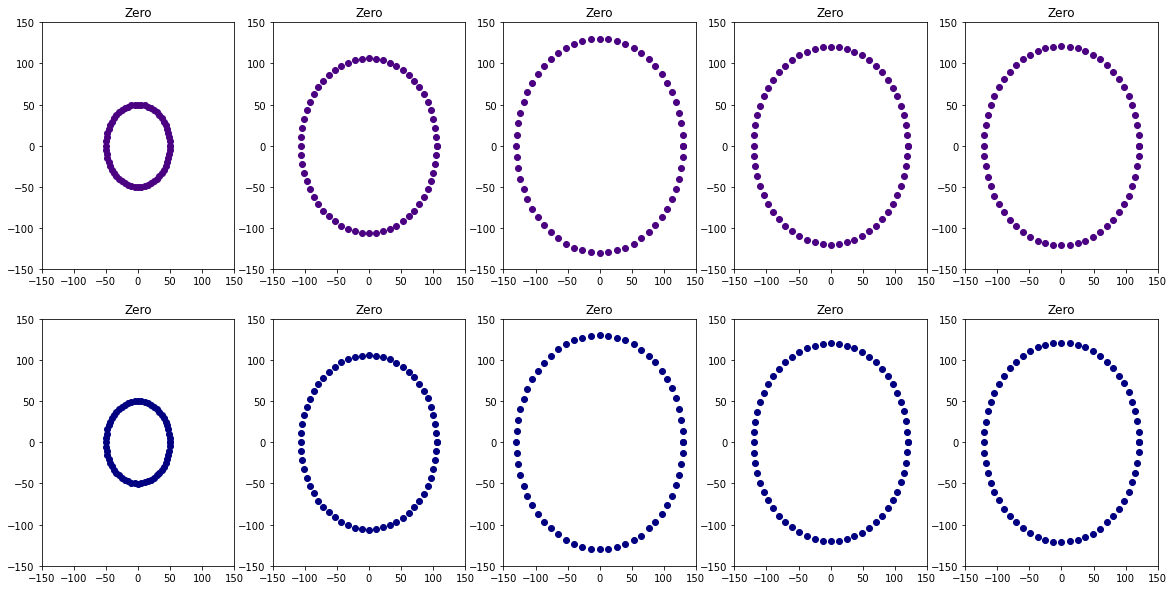

In [11]:
# Visualize Original Circles and Generated Circles below original ones

n = 5  # How many digits we will display
plt.figure(figsize=(20, 10))
for i in range(n):
    # Display original
    original_X_points , original_y_points = test_X.iloc[i][::2] , test_X.iloc[i][1::2] 
    ax = plt.subplot(2, n, i + 1)
    plt.xlim([-150, 150])
    plt.ylim([-150,150])
    plt.title("Zero")
    plt.scatter(original_X_points, original_y_points ,  color='indigo')

    # Display reconstruction
    
    predicted_X_points , predicted_y_points = decoded_circles[i][::2] , decoded_circles[i][1::2] 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.xlim([-150, 150])
    plt.ylim([-150,150])
    plt.title("Zero")
    plt.scatter(original_X_points, predicted_y_points ,  color='navy')
    
plt.show()

